In [1]:
#Reloads the modules to update any changes
%load_ext autoreload
%autoreload 2

import numpy as np
import pickle
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy.polynomial.polynomial as poly
import seaborn as sns
import matplotlib.colors as mcolors
from sympy import S, symbols
import regression_phi_nmono as regression

In [2]:
# note these files are not made available on git

In [2]:
f = open('../instance_files/instance_iceagg_flat_r10_compareDunnavan1', 'rb')
agg_as_flat, agg_bs_flat, agg_cs_flat, phi2Ds_flat, cplxs_flat, dds_flat = pickle.load(f)
f.close()
f = open('../instance_files/instance_iceagg_rand_r10_compareDunnavan', 'rb')
agg_as_rand, agg_bs_rand, agg_cs_rand, phi2Ds_rand, cplxs_rand, dds_rand, major_ax_zs, depths = pickle.load(f)
f.close()
f = open('../instance_files/instance_iceagg_flat_phiextremes_n100_r10', 'rb')
agg_as_flatx, agg_bs_flatx, agg_cs_flatx, phi2Ds_flatx, cplxs_flatx, dds_flatx = pickle.load(f)

In [3]:
f = open('../instance_files/instance_iceagg_flat_allphi_n150_r10_plates', 'rb')
array_plates = pickle.load(f)
agg_as_plates_flat = array_plates['agg_as']
agg_bs_plates_flat = array_plates['agg_bs']
agg_cs_plates_flat = array_plates['agg_cs']
phi2Ds_plates_flat = array_plates['phi2Ds']
cplxs_plates_flat = array_plates['cplxs']
dds_plates_flat = array_plates['dds']

f = open('../instance_files/instance_iceagg_flat_allphi_n150_r10_columns', 'rb')
array_columns = pickle.load(f)
agg_as_columns_flat = array_columns['agg_as']
agg_bs_columns_flat = array_columns['agg_bs']
agg_cs_columns_flat = array_columns['agg_cs']
phi2Ds_columns_flat = array_columns['phi2Ds']
cplxs_columns_flat = array_columns['cplxs']
dds_columns_flat = array_columns['dds']

f = open('../instance_files/instance_iceagg_rand_n150_r10_plates_reproduce', 'rb')
array_plates = pickle.load(f)
agg_as_plates_rand = array_plates['agg_as']
agg_bs_plates_rand = array_plates['agg_bs']
agg_cs_plates_rand = array_plates['agg_cs']
phi2Ds_plates_rand = array_plates['phi2Ds']
cplxs_plates_rand = array_plates['cplxs']
dds_plates_rand = array_plates['dds']

f = open('../instance_files/instance_iceagg_rand_n150_r10_columns_reproduce', 'rb')
array_columns = pickle.load(f)
agg_as_columns_rand = array_columns['agg_as']
agg_bs_columns_rand = array_columns['agg_bs']
agg_cs_columns_rand = array_columns['agg_cs']
phi2Ds_columns_rand = array_columns['phi2Ds']
cplxs_columns_rand = array_columns['cplxs']
dds_columns_rand = array_columns['dds']

In [5]:
f = open('../instance_files/instance_iceagg_rand_n150_a10_phi5_eqmajorax', 'rb')
agg_as_rand, agg_bs_rand, agg_cs_rand, phi2D_rand, dds_rand = pickle.load(f)


f = open('../instance_files/instance_iceagg_flat_n100_a1000_allphi_eqmajorax', 'rb')
array = pickle.load(f)
agg_as_flat = array['agg_as']
agg_bs_flat = array['agg_bs']
agg_cs_flat = array['agg_cs']
phi2Ds_flat = array['phi2Ds']
cplxs_flat = array['cplxs']
dds_flat = array['dds']

In [4]:
agg_as_rand = np.concatenate((agg_as_plates_rand, agg_as_columns_rand))
agg_bs_rand = np.concatenate((agg_bs_plates_rand, agg_bs_columns_rand))
agg_cs_rand = np.concatenate((agg_cs_plates_rand, agg_cs_columns_rand))
phi2Ds_rand = np.concatenate((phi2Ds_plates_rand, phi2Ds_columns_rand))
cplxs_rand = np.concatenate((cplxs_plates_rand, cplxs_columns_rand))
dds_rand = np.concatenate((dds_plates_rand, dds_columns_rand))

agg_as_flat = np.concatenate((agg_as_plates_flat, agg_as_columns_flat))
agg_bs_flat = np.concatenate((agg_bs_plates_flat, agg_bs_columns_flat))
agg_cs_flat = np.concatenate((agg_cs_plates_flat, agg_cs_columns_flat))
phi2Ds_flat = np.concatenate((phi2Ds_plates_flat, phi2Ds_columns_flat))
cplxs_flat = np.concatenate((cplxs_plates_flat, cplxs_columns_flat))
dds_flat = np.concatenate((dds_plates_flat, dds_columns_flat))

In [5]:
phica_rand = agg_cs_rand/agg_as_rand
phica_flat = agg_cs_flat/agg_as_flat
phiba_rand = agg_bs_rand/agg_as_rand
phiba_flat = agg_bs_flat/agg_as_flat

In [6]:
large = 20; med = 16; small = 14
params = {'axes.titlesize': large,
          'legend.fontsize': small,
          'figure.figsize': (7,7),
          'axes.labelsize': large,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large,
          "font.family": "serif"}
plt.rcParams.update(params)

In [21]:
Ns = np.arange(0,149,1)
phios = [0.01, 0.10, 0.50, 1.0, 2.0, 10.0, 100.0]

modes_rand_ba=[]
modes_rand_ca = []
modes_flat_ba=[]
modes_flat_ca=[]

orientations = ['rand', 'flat']
for orientation in orientations:
    phiba = phiba_rand if orientation == 'rand' else phiba_flat
    phica = phica_rand if orientation == 'rand' else phica_flat
    for p, phio  in enumerate(phios):    
        for N in Ns:

            data = np.vstack([phiba[p,0,:,N], phica[p,0,:,N]])
            kde = st.gaussian_kde(data)
            
            reg = regression.KDE(kde)
            mode_ba, mode_ca = reg.modes()
            if orientation == 'rand':
                modes_rand_ba.append(mode_ba)
                modes_rand_ca.append(mode_ca)
            else:
                modes_flat_ba.append(mode_ba)
                modes_flat_ca.append(mode_ca)


Aggregate aspect ratio evolution as a function of the number of monomers that comprise the aggregate (x-axis) for φca (top) and φba (bottom). Best fit lines from the modes of each kernel density estimate (e.g.,dots in Figure 6) are plotted for the random orientation (dashed lines) and the quasi-horizontal orientation (solid lines). 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

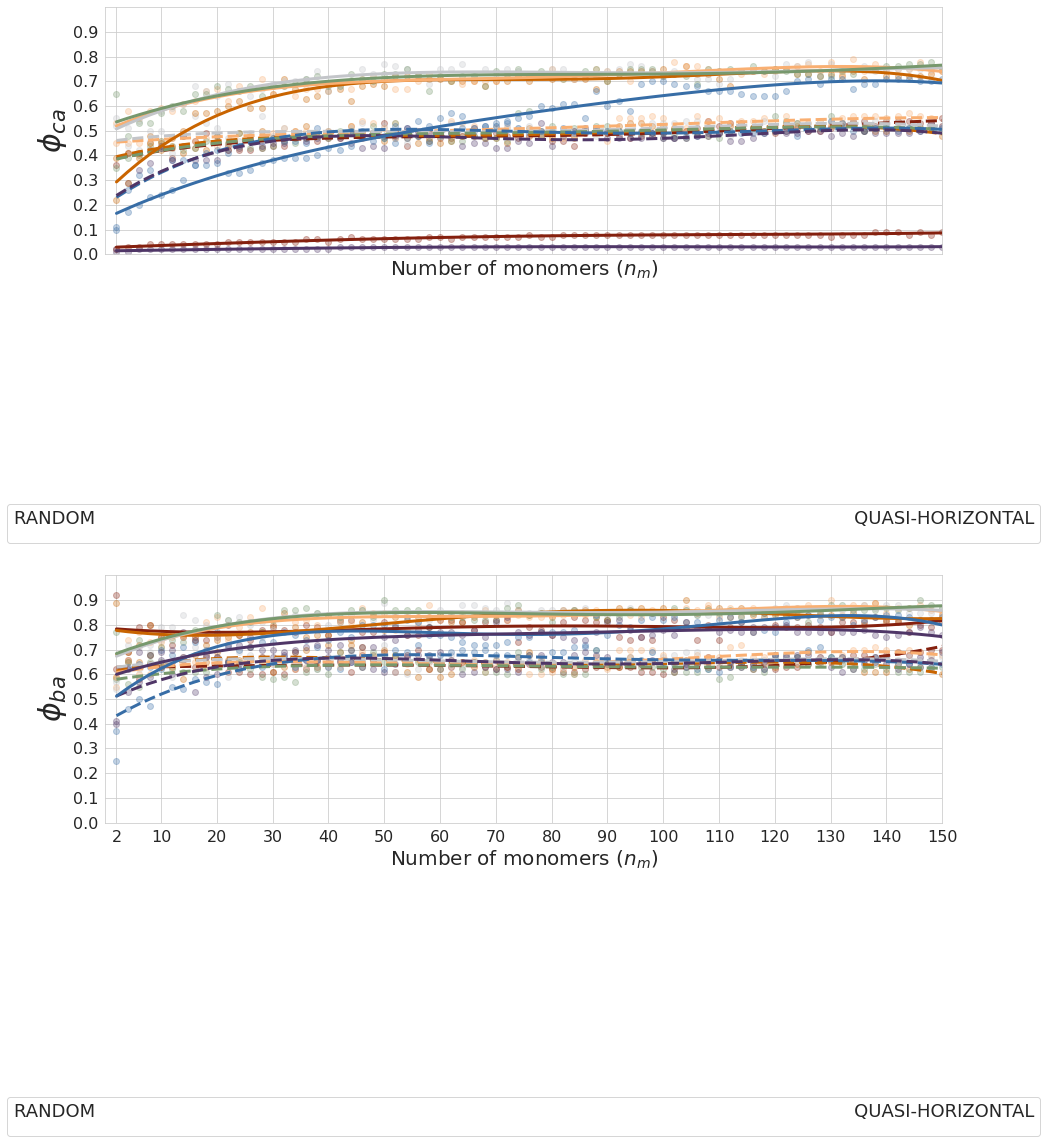

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

fig, axes = plt.subplots(2,1, figsize=(15,15), sharex=True);
fig.subplots_adjust(hspace=1.3)

axs = axes.ravel()

modes_rand_ba = np.reshape(modes_rand_ba, (len(phios), len(Ns)))
modes_rand_ca = np.reshape(modes_rand_ca, (len(phios), len(Ns)))
modes_flat_ba = np.reshape(modes_flat_ba, (len(phios), len(Ns)))
modes_flat_ca = np.reshape(modes_flat_ca, (len(phios), len(Ns)))

orientations = ['rand', 'flat']
for orientation in orientations:
    for p, phio  in enumerate(phios):        
        if orientation == 'rand':
            linestyle = '--'
            modes = regression.Plot(axs, modes_rand_ba, modes_rand_ca, phios)
        else:
            linestyle = '-'
            modes = regression.Plot(axs, modes_flat_ba, modes_flat_ca, phios)
        modes.fit(p)
        modes.plot(p, linestyle)
            
plt.savefig('../plots/N_phi_polyfit.pdf', bbox='tight')

In [138]:
# check a fit equation is correct when plugging in for nm
x=2
y = -2.50E-9*x**4+8.28E-7*x**3-1.14E-4*x**2+1.06E-2*x+1.44E-1
y

0.16475058399999998

Below: Evolution of φba(x-axis) and φca(y-axis) for different monomer aspect ratios (φm, top to bottom) andnumber of monomers (nm, left to right). Each aggregate is formed 300 times every time a new monomer is addedfor the random orientation (red) and quasi-horizontal orientation (blue) to create a multivariate kernel density estimate (contoured).

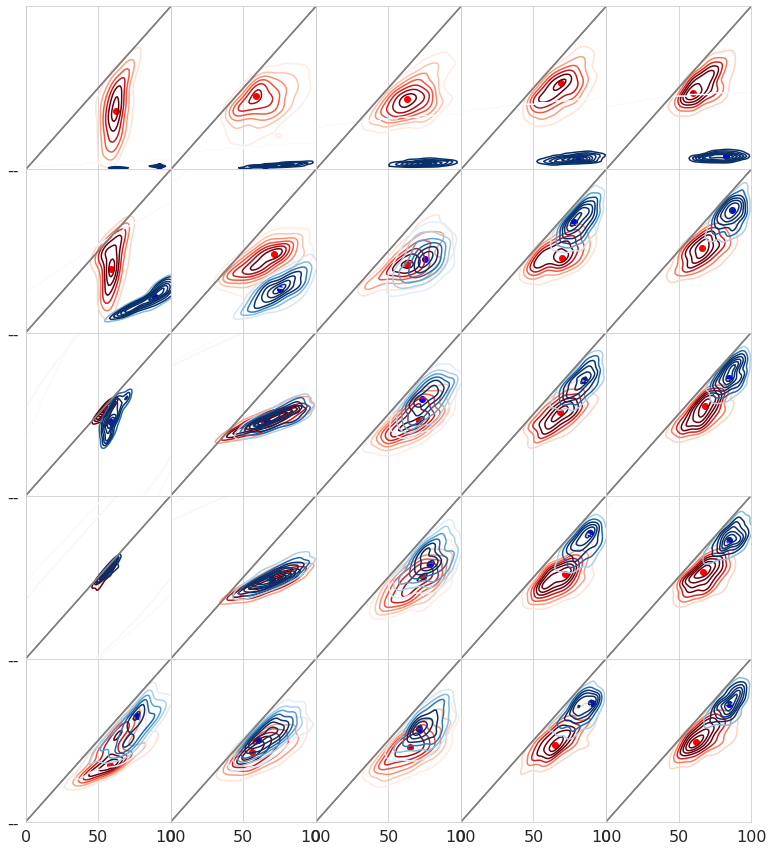

In [19]:
fig, axes = plt.subplots(5,5, figsize=(13,15), sharex=True, sharey=True)
axs = axes.ravel()
plt.subplots_adjust(wspace=0, hspace=0)

Ns = [0,1,8,48,98]
phios = [0,1,2,3,4]
sns.set_style('whitegrid')


orientations = ['rand', 'flat']
for orientation in orientations:
    phiba = phiba_rand if orientation == 'rand' else phiba_flat
    phica = phica_rand if orientation == 'rand' else phica_flat
    contour_color='Blues' if orientation == 'flat' else 'Reds'
    mode_color = 'r' if orientation == 'rand' else 'b'
    i=0
    for p, phio  in enumerate(phios):    
        for N in Ns:
            data = np.vstack([phiba[p,0,:,N], phica[p,0,:,N]])
            kde = st.gaussian_kde(data)
            
            reg = regression.KDE(kde)
            Z = reg.estimate_kde()
            mode_ba, mode_ca = reg.modes()
            
            img = axs[i].contour(Z, cmap=contour_color, vmin=1, vmax=10)
            axs[i].scatter(float(mode_ca*100), float(mode_ba*100), color = mode_color)
            # plot diagonal lines to prolate spheroid
            axs[i].plot(np.linspace(0.0,100,10),np.linspace(0.0,100,10), 'gray', '--', zorder=2)
            i+=1

In [19]:
#prints the primary shape per phi_m-N pair as oblate or prolate
Ns = [0, 1, 8, 48, 98, 148]
phioarr=[0.01, 0.1, 0.5, 1.0, 2.0, 10., 100]
phios = [0,1,2,3,4,5,6] #0.1, 0.25, 0.5, 1.0, 2.0, 4.0, 10.
print('phi \t N \t oblates\t prolates \tprolates majority?')

for c, phio in enumerate(phios):    
    for n, N in enumerate(Ns):
        oblates = 0
        prolates = 0
        for l in range(300):
            if agg_bs_flat[phio,0,l,N] - agg_cs_flat[phio,0,l,N] <= agg_as_flat[phio,0,l,N] - agg_bs_flat[phio,0,l,N]:
                prolates +=1
            else:
                oblates+=1
        if prolates>oblates:
            bigger = 'True'
        else:
            bigger = ' '
            
            
        print('%3.2f, %5d, %10.2f, %15.2f, %15s' %(phioarr[phio], Ns[n]+2, (oblates/300)*100, (prolates/300)*100, bigger))
            


phi 	 N 	 oblates	 prolates 	prolates majority?
0.01,     2,     100.00,            0.00,                
0.01,     3,      98.00,            2.00,                
0.01,    10,      98.00,            2.00,                
0.01,    50,      99.00,            1.00,                
0.01,   100,     100.00,            0.00,                
0.01,   150,      99.33,            0.67,                
0.10,     2,     100.00,            0.00,                
0.10,     3,      86.00,           14.00,                
0.10,    10,      57.00,           43.00,                
0.10,    50,      35.67,           64.33,            True
0.10,   100,      47.67,           52.33,            True
0.10,   150,      38.67,           61.33,            True
0.50,     2,       0.00,          100.00,            True
0.50,     3,      46.33,           53.67,            True
0.50,    10,      36.33,           63.67,            True
0.50,    50,      37.67,           62.33,            True
0.50,   100,      39.33,